In [101]:
from cProfile import label

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%reload_ext autoreload
%autoreload 2

### Loading data

In [105]:
path="../data/diabetes.csv"
diabetes_df=pd.read_csv(path)

### splitting data

In [106]:
from sklearn.model_selection import train_test_split

diabetes_train,diabetes_test=train_test_split(diabetes_df,test_size=0.2,random_state=42)

In [107]:
diabetes_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56553 entries, 61789 to 15795
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       56553 non-null  float64
 1   HighBP                56553 non-null  float64
 2   HighChol              56553 non-null  float64
 3   CholCheck             56553 non-null  float64
 4   BMI                   56553 non-null  float64
 5   Smoker                56553 non-null  float64
 6   Stroke                56553 non-null  float64
 7   HeartDiseaseorAttack  56553 non-null  float64
 8   PhysActivity          56553 non-null  float64
 9   Fruits                56553 non-null  float64
 10  Veggies               56553 non-null  float64
 11  HvyAlcoholConsump     56553 non-null  float64
 12  AnyHealthcare         56553 non-null  float64
 13  NoDocbcCost           56553 non-null  float64
 14  GenHlth               56553 non-null  float64
 15  MentHlth            

In [108]:
diabetes_train.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
61789,1.0,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,3.0,0.0,1.0,11.0,4.0,6.0
46280,1.0,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,11.0,4.0,2.0
18465,0.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,4.0,10.0,27.0,1.0,0.0,8.0,5.0,5.0
45540,1.0,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,12.0,6.0,7.0
28119,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,2.0,1.0,0.0,5.0,2.0,2.0


### Visualizing Age Data

In [109]:
diabetes_train["Age"].describe()

count    56553.000000
mean         8.576769
std          2.852993
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         13.000000
Name: Age, dtype: float64

In [110]:
age_count=diabetes_train["Age"].value_counts().sort_index()

age_count

Age
1.0      789
2.0     1129
3.0     1635
4.0     2231
5.0     2828
6.0     3713
7.0     5557
8.0     6907
9.0     8018
10.0    8716
11.0    6412
12.0    4295
13.0    4323
Name: count, dtype: int64

In [114]:
labels = ["18 to 24","25 to 29","30 to 34","35 to 39","40 to 44","45 to 49","50 to 54","55 to 59",
          "60 to 64","65 to 69","70 to 74","75 to 79","80 or older"]

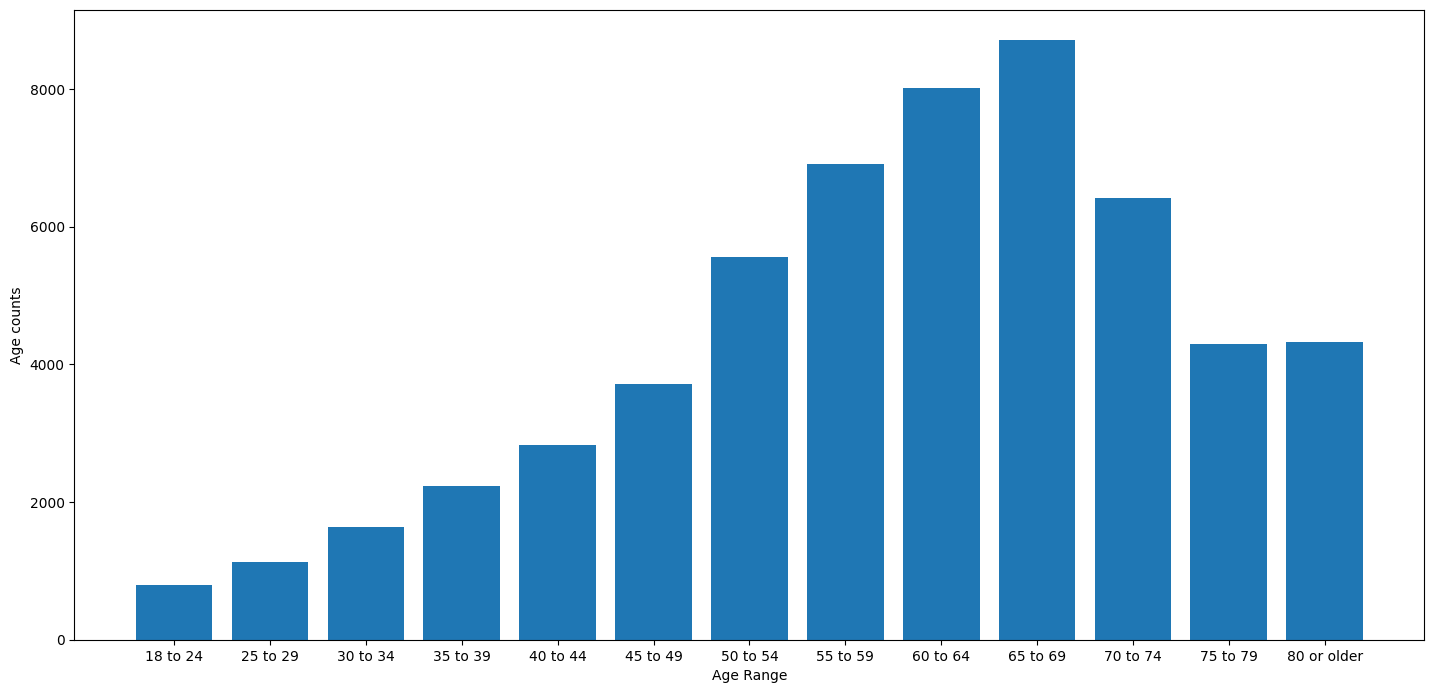

In [115]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.set_xlabel('Age Range')
age_axes.set_ylabel('Age counts')

age_axes.bar(labels,age_count.values)

plt.show()

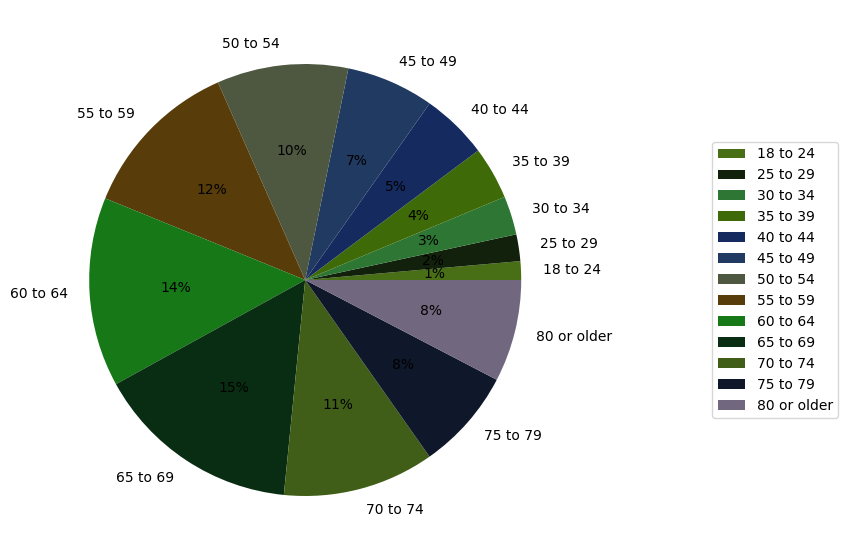

In [117]:
import random

age_figer=plt.figure(figsize=(10,6),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(age_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)

wedges, texts, autotexts=age_axes.pie(age_count.values,labels=labels,
                                      colors=colors,autopct="%1.0f%%") #,textprops=dict(color="w")
plt.legend(wedges,labels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [118]:
age_diabetes_distribution =(
    diabetes_train.groupby(by=["Age","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

age_diabetes_distribution

Diabetes_binary,0.0,1.0
Age,,
1.0,728,61
2.0,1013,116
3.0,1383,252
4.0,1744,487
5.0,1981,847
6.0,2337,1376
7.0,3052,2505
8.0,3473,3434
9.0,3457,4561


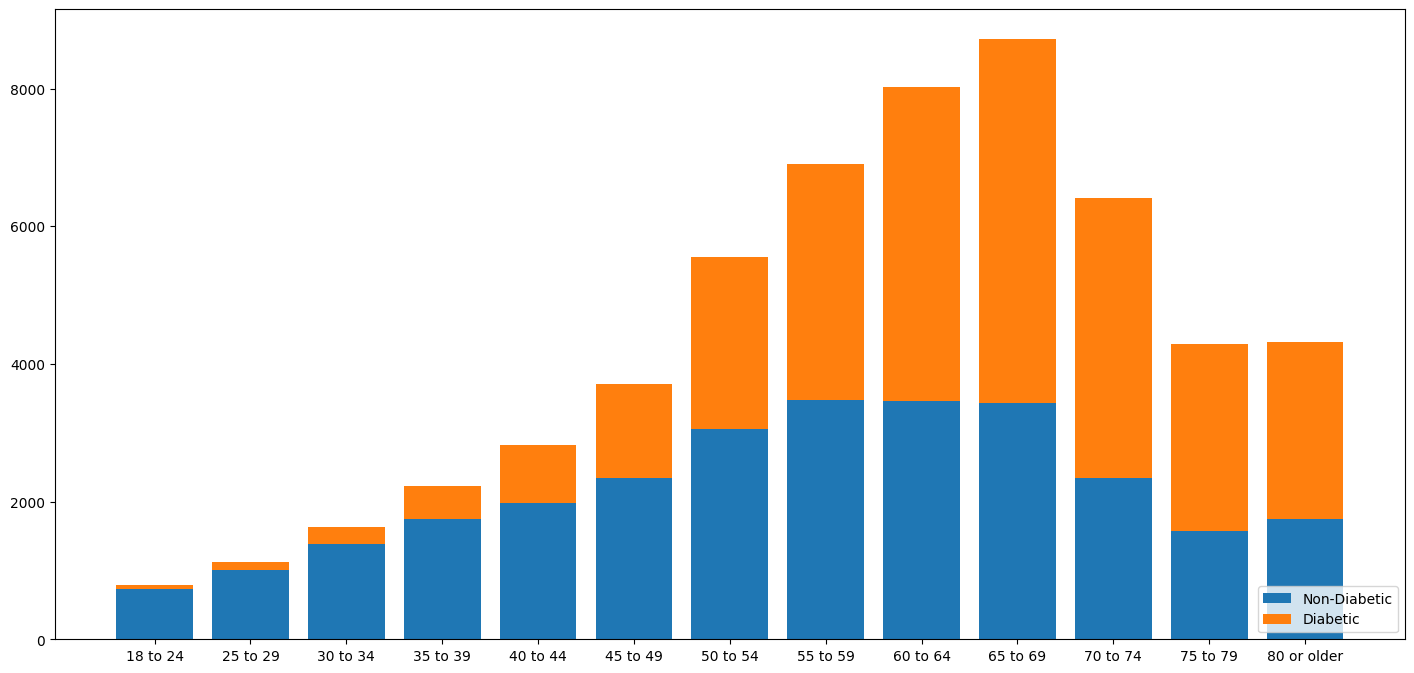

In [122]:
age_figer=plt.figure(figsize=(15,7),dpi=100)
age_axes=age_figer.add_axes([0.1,0.1,0.9,0.9])

age_axes.bar(labels,age_diabetes_distribution [0],label="Non-Diabetic")
age_axes.bar(labels,age_diabetes_distribution [1],label="Diabetic",bottom=age_diabetes_distribution [0])
plt.legend(loc="lower right")


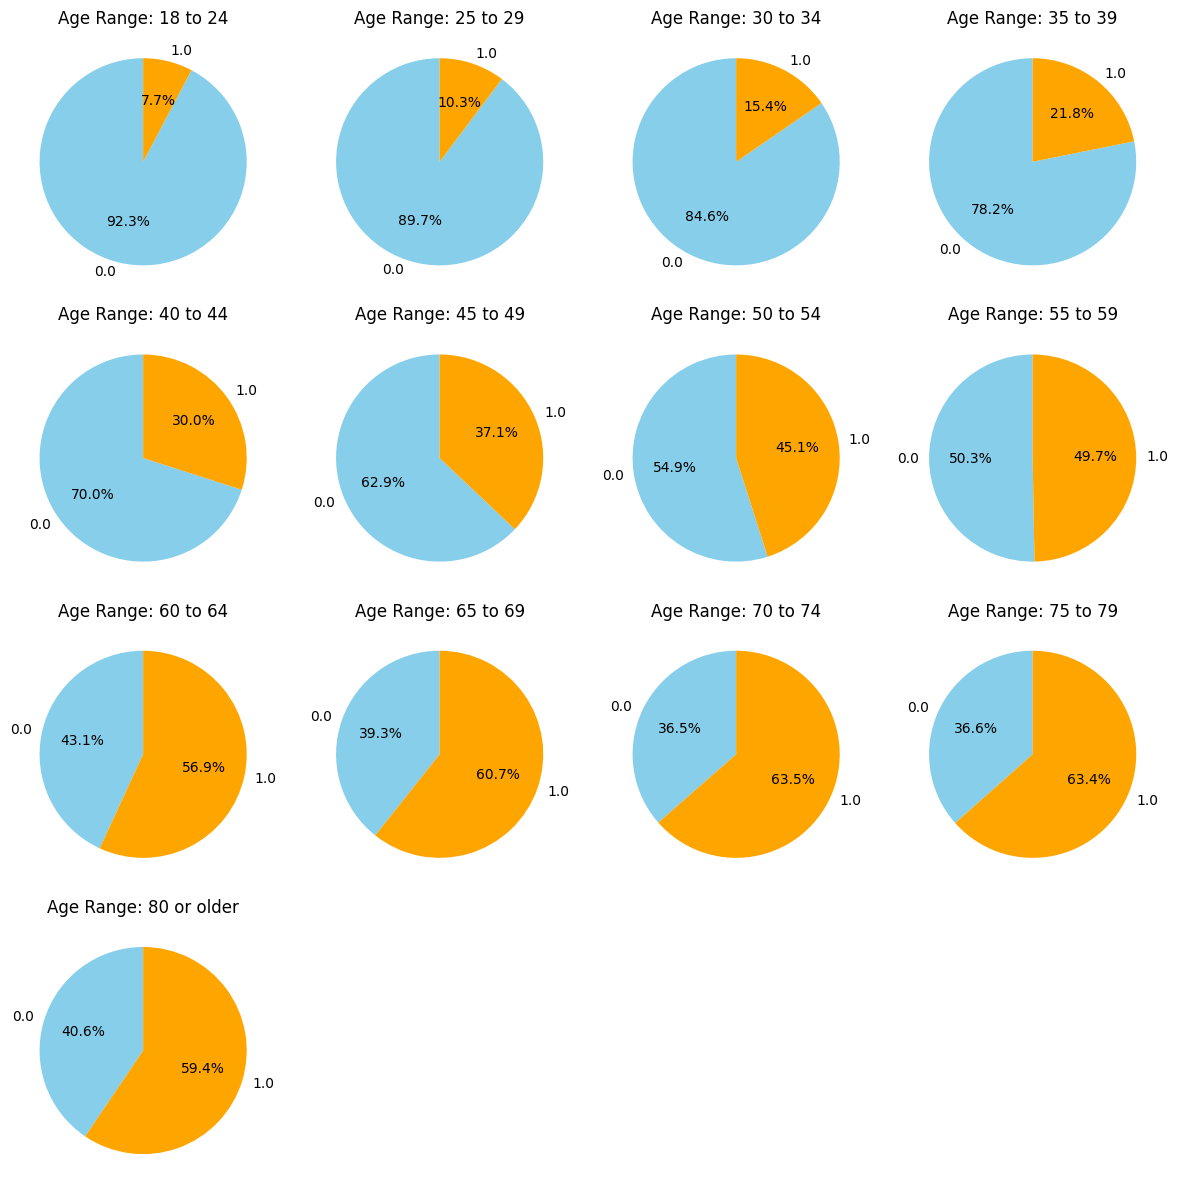

In [128]:
import math

age_diabetes_percentage = age_diabetes_distribution.div(age_diabetes_distribution.sum(axis=1), axis=0) * 100

num_age_ranges = len(age_diabetes_percentage)

rows = math.ceil(num_age_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, age_range in enumerate(labels):
    data = age_diabetes_percentage.loc[labels.index(age_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Age Range: {age_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Visualizing Education Data

In [131]:
diabetes_train["Education"].describe()

count    56553.000000
mean         4.922551
std          1.030487
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          6.000000
Name: Education, dtype: float64

In [132]:
education_count=diabetes_train["Education"].value_counts().sort_values()
education_count

Education
1.0       61
2.0     1322
3.0     2773
4.0    15525
5.0    15971
6.0    20901
Name: count, dtype: int64

In [134]:
education_levels = [
    "Never Attended School",
    "Elementary",
    "High School",
    "Some College Degree",
    "Advanced Degree",
    "6" 
]

<BarContainer object of 6 artists>

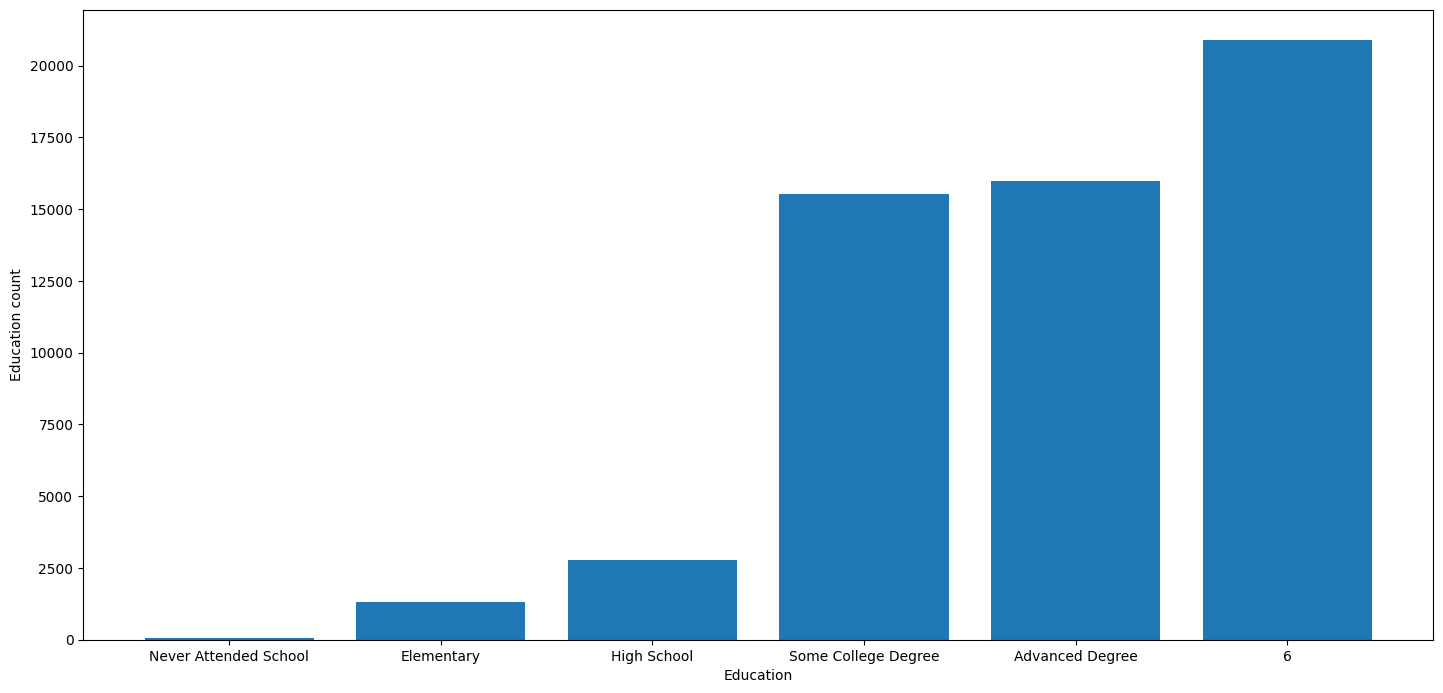

In [135]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.set_xlabel('Education')
education_axes.set_ylabel('Education count')

education_axes.bar(education_levels,education_count.values)

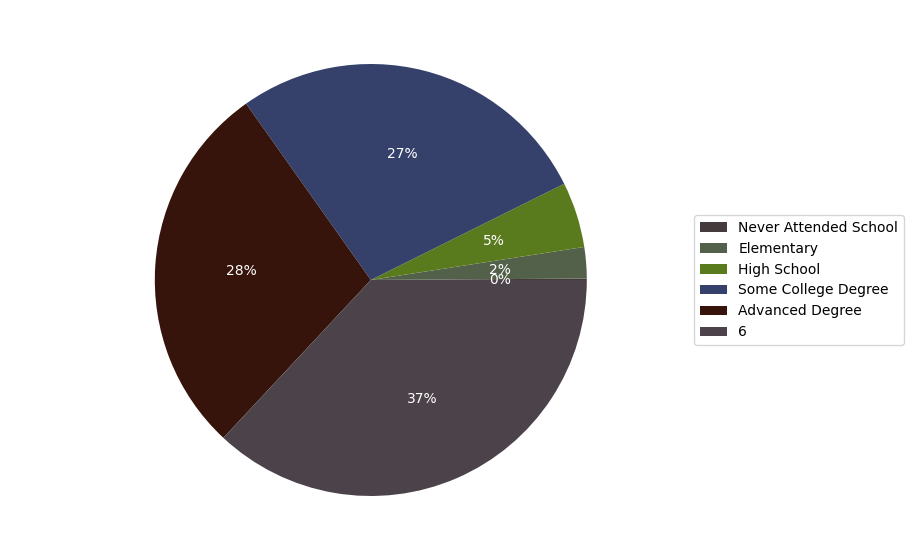

In [136]:
import random

education_figer=plt.figure(figsize=(20,6),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

colors=[]
for i in range(education_count.size):
    rgb=(random.uniform(0,0.5),random.uniform(0,0.5),random.uniform(0,0.5))
    colors.append(rgb)


wedges, texts, autotexts=education_axes.pie(education_count.values,labels=education_levels,
                                      colors=colors,autopct="%1.0f%%",textprops=dict(color="w"))
plt.legend(wedges,education_levels,loc="right",bbox_to_anchor=(1,0,0.5,1))

plt.show()

In [137]:
education_diabetes_distribution =(
    diabetes_train.groupby(by=["Education","Diabetes_binary"])["Diabetes_binary"]
    .count()
    .unstack(fill_value=0)
)

education_diabetes_distribution

Diabetes_binary,0.0,1.0
Education,,
1.0,26,35
2.0,370,952
3.0,920,1853
4.0,6720,8805
5.0,7731,8240
6.0,12489,8412


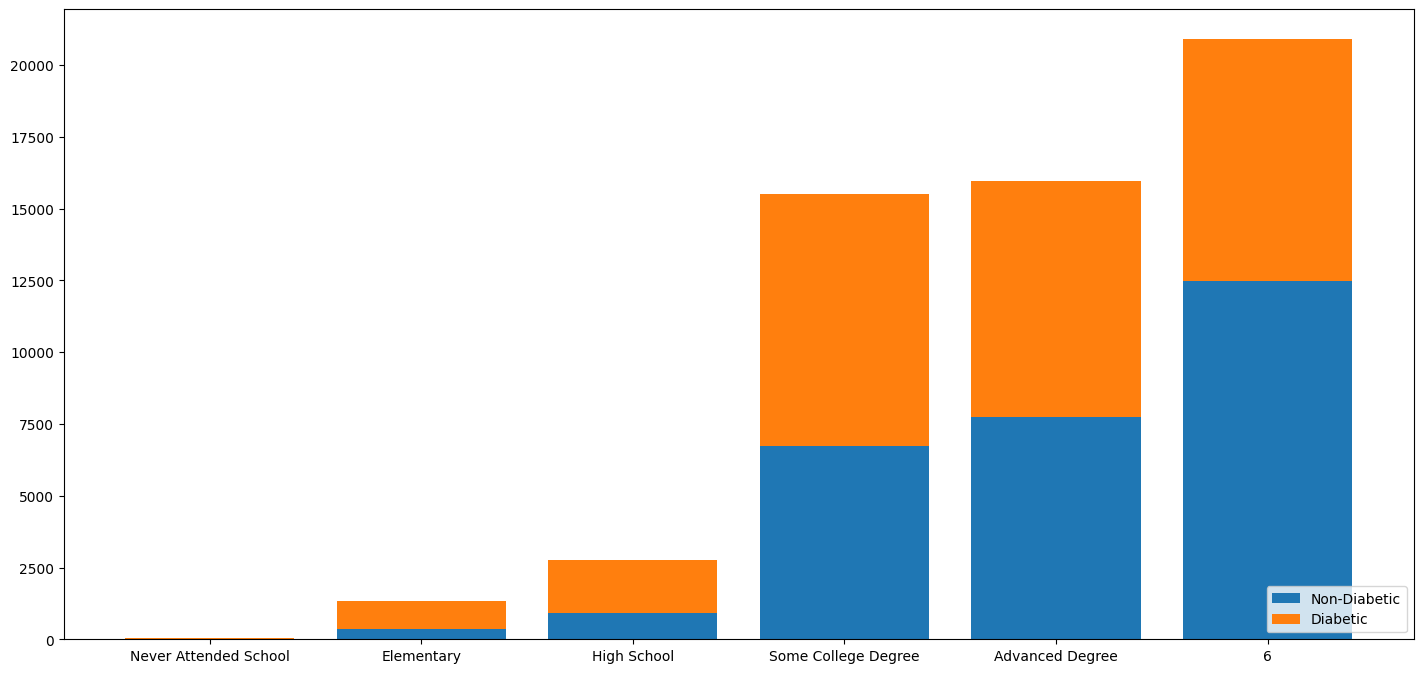

In [139]:
education_figer=plt.figure(figsize=(15,7),dpi=100)
education_axes=education_figer.add_axes([0.1,0.1,0.9,0.9])

education_axes.bar(education_levels,education_diabetes_distribution [0],label="Non-Diabetic")
education_axes.bar(education_levels,education_diabetes_distribution [1],label="Diabetic",bottom=education_diabetes_distribution [0])
plt.legend(loc="lower right")

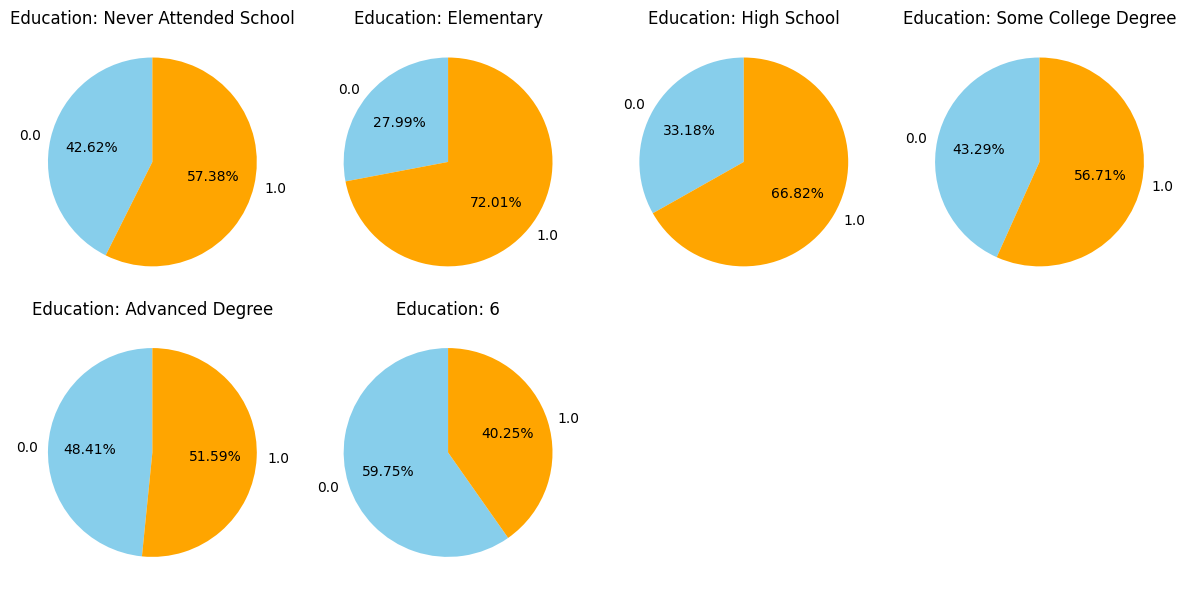

In [143]:
import math

education_diabetes_percentage = education_diabetes_distribution.div(education_diabetes_distribution.sum(axis=1), axis=0) * 100

num_education_ranges = len(education_diabetes_percentage)

rows = math.ceil(num_education_ranges / 4)
fig, axes = plt.subplots(rows, 4, figsize=(12, rows * 3), dpi=100)

axes = axes.flatten()

for i, education_range in enumerate(education_levels):
    data = education_diabetes_percentage.loc[education_levels.index(education_range)+1]
    axes[i].pie(data, labels=data.index, autopct='%0.2f%%', startangle=90, colors=['skyblue', 'orange'])
    axes[i].set_title(f'Education: {education_range}')
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## visualizing General Health data 

selecting the colors

In [144]:
colors = ['#66b3ff', '#ff6666']

### 1.histograms

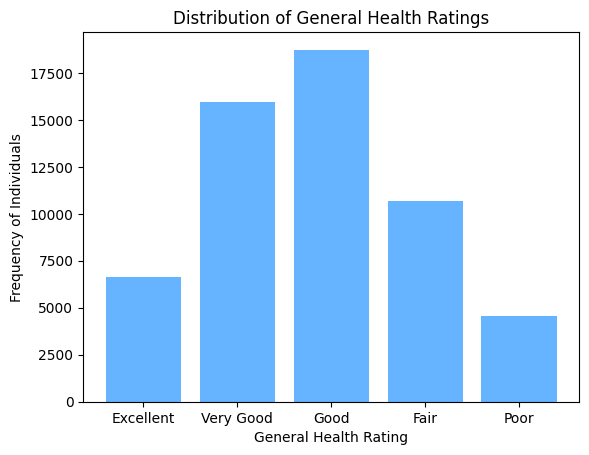

In [153]:
# Define the order of bins
ratings = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Calculate frequency and reindex
freq = diabetes_train["GenHlth"].value_counts().sort_index()

# Use bar chart instead of histogram
plt.bar(ratings, freq.values, color=colors[0])
plt.ylabel("Frequency of Individuals")
plt.xlabel("General Health Rating")
plt.title("Distribution of General Health Ratings")

plt.show()


### 2.bar chart

a bar chart that shows each general health rating with its number of occurances

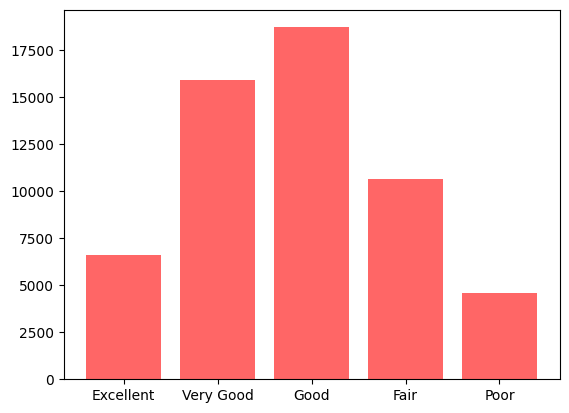

In [154]:
plt.bar(ratings, freq.values, color=colors[1])
plt.show()

a bar chart that shows each rating with its occurances, splitted to *'Diabetic'* and *'Non-Diabetic'*

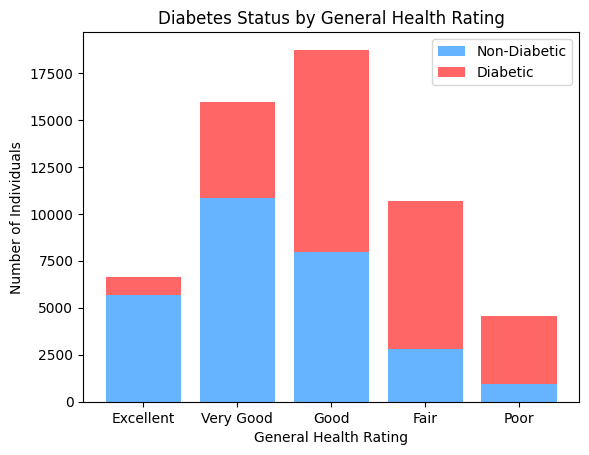

GenHlth  Diabetes_binary
1.0      0.0                 5704
         1.0                  926
2.0      0.0                10826
         1.0                 5124
3.0      0.0                 7965
         1.0                10766
4.0      0.0                 2792
         1.0                 7866
5.0      0.0                  969
         1.0                 3615
dtype: int64

In [155]:
group_sizes = diabetes_train.groupby(["GenHlth", "Diabetes_binary"]).size()

gen_hlth_diabetic= [int(group_sizes[i][1]) for i in freq.index]
gen_hlth_non_diabetic= [int(group_sizes[i][0]) for i in freq.index]

plt.bar(ratings, gen_hlth_non_diabetic, label='Non-Diabetic', color=colors[0])
plt.bar(ratings, gen_hlth_diabetic, bottom=gen_hlth_non_diabetic, label='Diabetic', color=colors[1])

#adding labels and title
plt.xlabel('General Health Rating')
plt.ylabel('Number of Individuals')
plt.title('Diabetes Status by General Health Rating')
plt.legend() #to show labels in the upper right corner
plt.show()
group_sizes

### 3.pie chart
each pie chart visualizes the proportion of diabetic and non-diabetic individuals in each health category, with the percentage distribution shown on the chart.

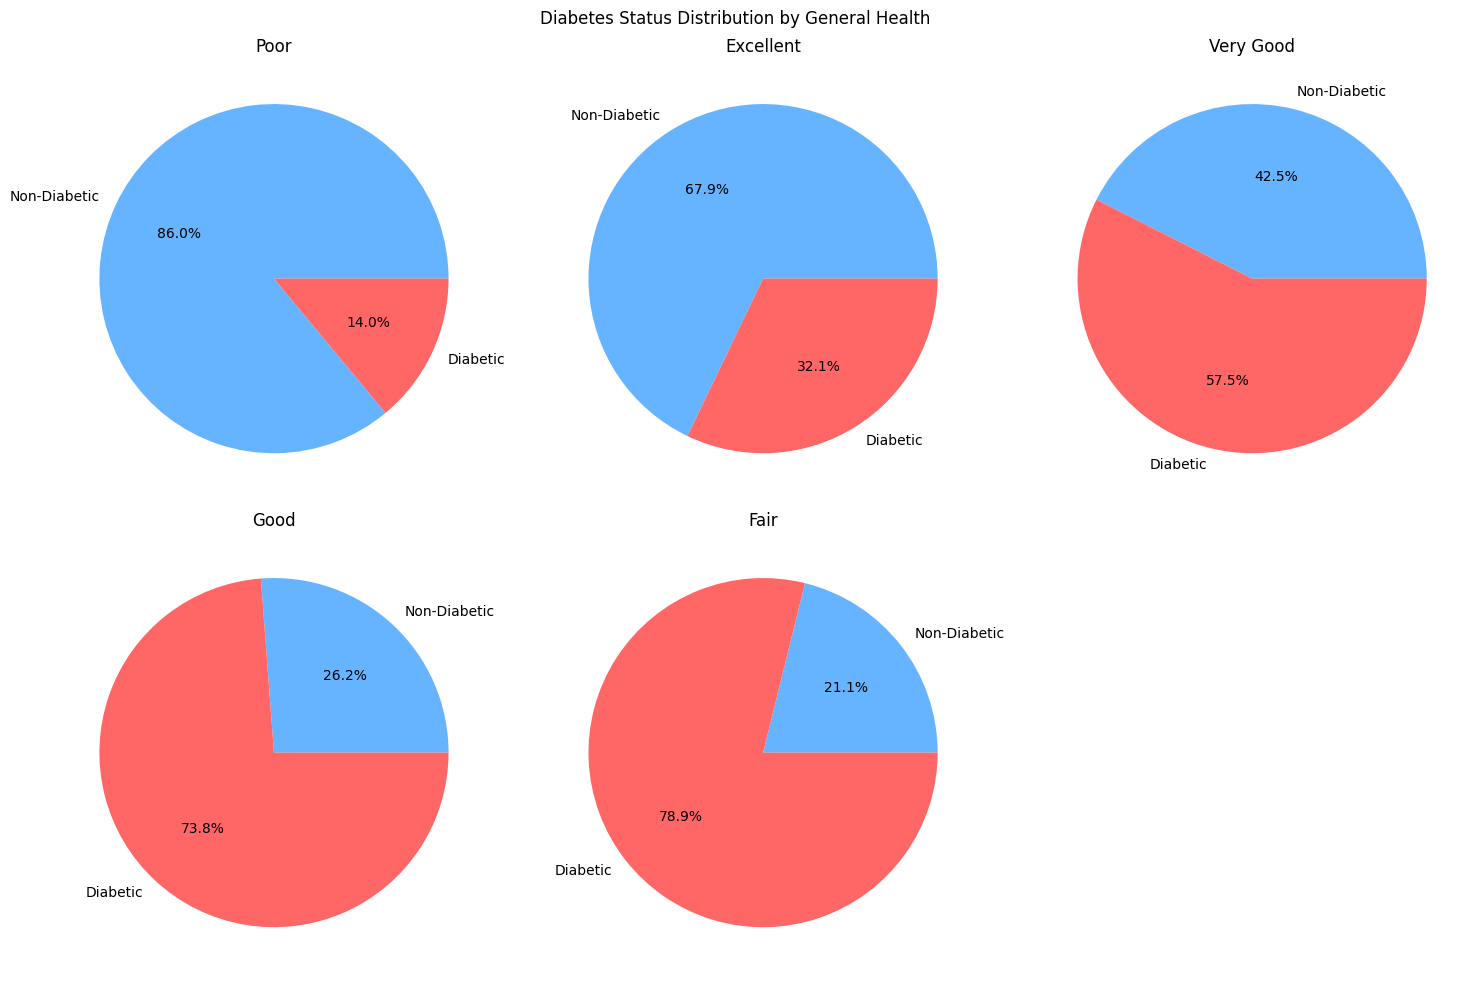

In [159]:
# Assuming you have the necessary data
num_plots = 5  # Number of pie charts to display
rows = 2  # Two rows
cols = 3  # Three columns

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figsize as needed

# Flatten axes array to easily index it
axes = axes.flatten()

for i, rating in enumerate(freq.index):
    ax = axes[i]  # Select the subplot
    ax.pie([int(group_sizes[rating][0]), int(group_sizes[rating][1])], 
           labels=["Non-Diabetic", "Diabetic"], autopct='%0.1f%%', colors=colors)
    ax.set_title(ratings[i-1])  # Use the updated categories

# Hide empty subplots (if any)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

fig.suptitle("Diabetes Status Distribution by General Health")
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Visualizing BMI Data

In [160]:
bmi_count=diabetes_train["BMI"].value_counts().sort_index()

bmi_count

BMI
12.0     1
13.0     5
14.0     5
15.0    23
16.0    51
        ..
87.0    11
89.0     4
92.0     8
95.0     3
98.0     2
Name: count, Length: 76, dtype: int64

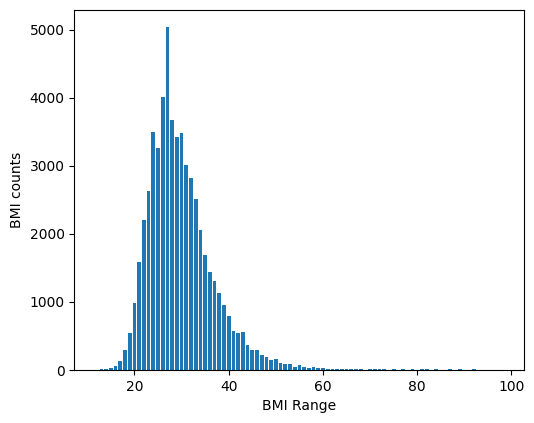

In [161]:
bmi_figer=plt.figure(figsize=(5,4),dpi=100)
bmi_axes=bmi_figer.add_axes([0.1,0.1,0.9,0.9])

bmi_axes.set_xlabel('BMI Range')
bmi_axes.set_ylabel('BMI counts')

bmi_axes.bar(bmi_count.index,bmi_count.values)

plt.show()

### Visualizing Veggies data
if the individual consumes veggies at least once per day 

In [162]:
diabetes_train["Veggies"].value_counts()

Veggies
1.0    44642
0.0    11911
Name: count, dtype: int64

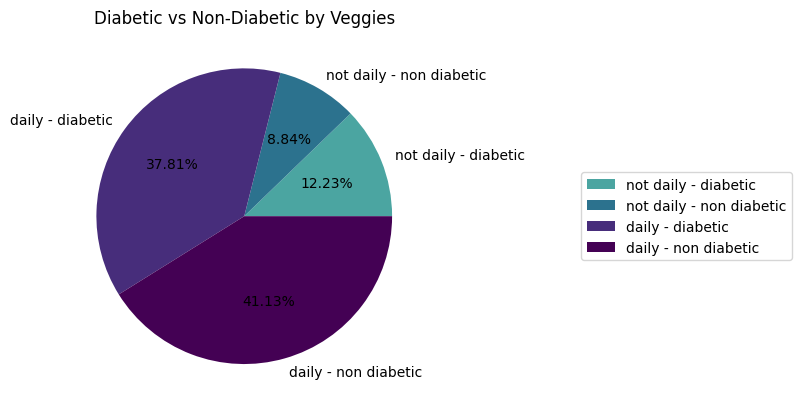

In [167]:
grouped_by_veggies = diabetes_train.groupby(["Veggies", "Diabetes_binary"]).size()
labels = ["not daily - diabetic", "not daily - non diabetic", "daily - diabetic", "daily - non diabetic"]
nums = [grouped_by_veggies[0][1], grouped_by_veggies[0][0], grouped_by_veggies[1][1], grouped_by_veggies[1][0]]
plt.pie(nums, labels=labels, autopct='%0.2f%%', colors=["#21908CCF", "#2C728EFF", "#472D7BFF", "#440154FF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Veggies")
plt.show()

### Visualizing Fruits data
if the individual consumes fruit at least once per day 

In [168]:
diabetes_train["Fruits"].value_counts()

Fruits
1.0    34716
0.0    21837
Name: count, dtype: int64

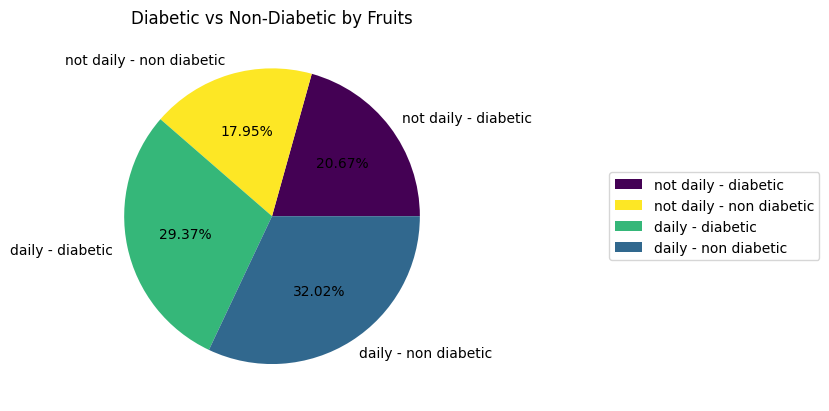

In [169]:
grouped_by_fruits = diabetes_train.groupby(["Fruits", "Diabetes_binary"]).size().sort_index()
nums = [grouped_by_fruits[0][1], grouped_by_fruits[0][0], grouped_by_fruits[1][1], grouped_by_fruits[1][0]]
plt.pie(nums, labels = labels, autopct='%0.2f%%', colors=["#440154FF", "#FDE725FF", "#35B779FF", "#31688EFF"])
plt.legend(loc="right",bbox_to_anchor=(1,0,1,1))
plt.title("Diabetic vs Non-Diabetic by Fruits")
plt.show()


### Drop ID,Income,and Education Columns

In [172]:
deleted_columns=["Income","Education","GenHlth","CholCheck","NoDocbcCost","AnyHealthcare"]

diabetes_train.drop(columns=deleted_columns,inplace=True)
diabetes_test.drop(columns=deleted_columns,inplace=True)

diabetes_train

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,Sex,Age
61789,1.0,1.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,11.0
46280,1.0,1.0,1.0,27.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,1.0,0.0,11.0
18465,0.0,1.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0,27.0,1.0,0.0,8.0
45540,1.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
28119,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,1.0,1.0,0.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,11.0
6265,0.0,1.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0
54886,1.0,1.0,1.0,23.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,11.0
860,0.0,1.0,0.0,28.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0


### Correlation Coefficient

In [173]:
corr_matrix = diabetes_train.select_dtypes(include=[np.number]).corr()

corr_matrix

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_binary,1.000000,0.382886,0.287534,0.291590,0.084502,0.123665,0.210604,-0.157313,-0.055248,-0.082759,-0.096100,0.086096,0.212298,0.272459,0.042273,0.280905
HighBP,0.382886,1.000000,0.317563,0.242306,0.086716,0.127974,0.209114,-0.134490,-0.037714,-0.065844,-0.027953,0.062393,0.172599,0.233235,0.039369,0.341610
HighChol,0.287534,0.317563,1.000000,0.131357,0.094068,0.097168,0.180600,-0.087316,-0.044081,-0.043050,-0.025235,0.081593,0.140472,0.160008,0.016303,0.246842
BMI,0.291590,0.242306,0.131357,1.000000,0.006793,0.021766,0.060503,-0.173318,-0.083665,-0.056856,-0.060815,0.102662,0.160415,0.244313,-0.002945,-0.035443
Smoker,0.084502,0.086716,0.094068,0.006793,1.000000,0.062421,0.120887,-0.078454,-0.073686,-0.028725,0.077769,0.092693,0.122427,0.121062,0.109675,0.105482
Stroke,0.123665,0.127974,0.097168,0.021766,0.062421,1.000000,0.217229,-0.078834,-0.009906,-0.045638,-0.022015,0.085534,0.161294,0.190958,-0.001054,0.124883
HeartDiseaseorAttack,0.210604,0.209114,0.180600,0.060503,0.120887,0.217229,1.000000,-0.091998,-0.018959,-0.034379,-0.039041,0.071927,0.191955,0.231479,0.096567,0.222131
PhysActivity,-0.157313,-0.134490,-0.087316,-0.173318,-0.078454,-0.078834,-0.091998,1.000000,0.133252,0.147545,0.020143,-0.131064,-0.234723,-0.276534,0.054302,-0.099442
Fruits,-0.055248,-0.037714,-0.044081,-0.083665,-0.073686,-0.009906,-0.018959,0.133252,1.000000,0.235578,-0.033953,-0.060317,-0.042423,-0.049491,-0.089226,0.062760
Veggies,-0.082759,-0.065844,-0.043050,-0.056856,-0.028725,-0.045638,-0.034379,0.147545,0.235578,1.000000,0.021326,-0.051212,-0.063545,-0.082629,-0.054009,-0.017877


In [174]:
corr_matrix["Diabetes_binary"].sort_values(ascending=False)

Diabetes_binary         1.000000
HighBP                  0.382886
BMI                     0.291590
HighChol                0.287534
Age                     0.280905
DiffWalk                0.272459
PhysHlth                0.212298
HeartDiseaseorAttack    0.210604
Stroke                  0.123665
MentHlth                0.086096
Smoker                  0.084502
Sex                     0.042273
Fruits                 -0.055248
Veggies                -0.082759
HvyAlcoholConsump      -0.096100
PhysActivity           -0.157313
Name: Diabetes_binary, dtype: float64

### Models

In [175]:
train_data=diabetes_train
test_data=diabetes_test
train_label=train_data["Diabetes_binary"]
test_label=test_data["Diabetes_binary"]
train_data=train_data.drop("Diabetes_binary",axis=1)
test_data=test_data.drop("Diabetes_binary",axis=1)

In [176]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42,max_iter=200)
model=logistic_regression.fit(train_data,train_label)

prediction=logistic_regression.predict(test_data)
model.score(test_data,test_label)

C:\Users\GIGABYTE\Desktop\CAP\Machine Learning\project\work\diabetes-prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7291887686540773